In [2]:
import networkx as nx
from libs.qap import QAP
from collections import defaultdict

%matplotlib inline

## Read Schoolday graph and create a copy
The original graph contains the communication and the copy will be used for linking all nodes of the same class.

In [4]:
G_orig = nx.read_gexf("../../../data/sp_data_school_day_1_g.gexf")

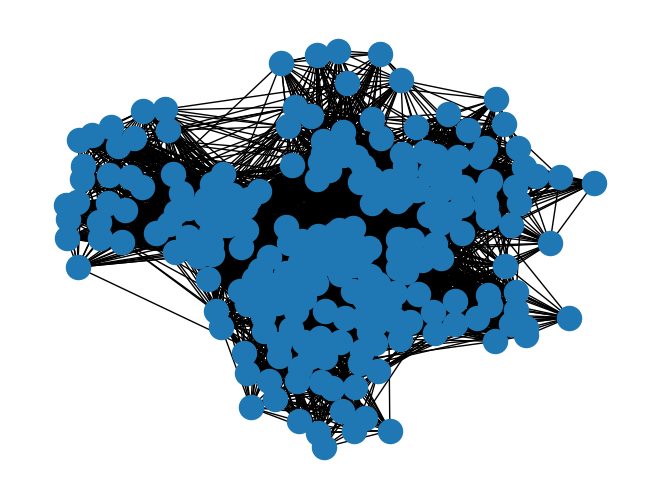

In [5]:
nx.draw(G_orig)

In [6]:
G_classes = G_orig.copy()

In [7]:
print(f"Number of nodes: {G_classes.number_of_nodes()}")
print(f"Number of edges: {G_classes.number_of_edges()}")

Number of nodes: 236
Number of edges: 5899


In [8]:
G_classes.remove_edges_from(G_classes.edges())

In [9]:
print(f"Number of nodes: {G_classes.number_of_nodes()}")
print(f"Number of edges: {G_classes.number_of_edges()}")

Number of nodes: 236
Number of edges: 0


## Add edge betweeen people of the same class

In [11]:
data = list(G_classes.nodes().data())
classes = {attributes["classname"] for (id, attributes) in data}

people_per_class = defaultdict(list)
for (id, attributes) in list(G_classes.nodes().data()):
    people_per_class[attributes["classname"]].append(id)
print(f"Number of classes (incl. teacher group): {len(list(people_per_class.keys()))}")

Number of classes (incl. teacher group): 11


In [12]:
for val in people_per_class.values():
    for i in range(0, len(val)):
        for j in range(i+1, len(val)):
            G_classes.add_edge(val[i], val[j])

In [13]:
print(f"Number of nodes: {G_classes.number_of_nodes()}")
print(f"Number of edges: {G_classes.number_of_edges()}")

Number of nodes: 236
Number of edges: 2495


## Create numpy arrays

In [15]:
nodes = list(G_orig.nodes())
orig_np = nx.to_numpy_array(G_orig, nodes)
classes_np = nx.to_numpy_array(G_classes, nodes)

## Execute QAP for check correlation between classes and communication behaviour

In [17]:
qap = QAP(orig_np, classes_np, 200)
qap.qap()

Pearson Correlation: 0.5436137325049648
p-value: 0.0
Pearson's correlation:
[[1.         0.54361373]
 [0.54361373 1.        ]]
Z-Test:(-57.89172572678762, 0.0)
T-Test:TtestResult(statistic=-57.89172572678762, pvalue=0.0, df=110918.0)


In [18]:
qap.summary()


# Permutations: 200
Correlation coefficients: Obs. Value(0.5436137325049648), Significance(0.0)

- Sum all betas: -0.054266999999999975
- Min betas: -0.016556
- Max betas: 0.017627
- Average betas: -0.00027133499999999994
- Std. Dev. betas: 0.006204952917853205

prop >= 0.5436137325049648: 0.0
prop <= 0.5436137325049648: 1.0 (proportion of randomly generated correlations that were as large as the observed)



## Result
There is a rather strong and significant correlation between the communication behaviour and class label. All of the calculated correlation scores in the permuted networks are lower than the reference value. Calculating the r-squared value (coefficient of determination) states that about 30% of the communication behaviour can be attributed to the same class property.

I suppose that the correlation increases remarkably when dropping the teachers because teachers mainly communicate with their classes and not with other teachers, but all teachers are connected because of their 'teacher' class attribute